# Synthèse de ce qui a été vu jusqu'à présent



On a pris en main python et les librairies scientifiques de bases.

Accent particulier sur 
- NumPy : pour la manipulation simple et rapide des données 
- Matplotlib : pour la visualisation
- Scikit Learn : Nous avons utilisé le module de régression linéaire

Nous avons pris connaissance de quelques propriétés fondamentales de la distribution gaussienne (ou normale), qui joue un rôle important à cause du théorème central limit.

Nous avons introduit le modèle de régression linéaire, en rappelant les hypothèses de bases :
* les erreurs suivent une loi normale de moyenne nulle
* la variance est la même pour tous (homoscédasticité) : la variance est la même pour l'ensemble des termes d'erreures gaussiens
$Var(\epsilon_i)=\sigma$
* les termes d'erreurs pour les différents $x_i$ sont indépendants les uns des autres

et montrer comment calculer les coefficients optimaux qui expliquent au mieux les données

Nous avons introduit le coefficient R2, qui est un outil de diagnostique de la régression.


# Exemple pratique de régression linéaire

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Trouvez comment lire un csv avec numpy, et ouvrez le fichier `x01.txt` dans le même répetoire que ce notebook.

Notez qu'il faut ignorer les 33 premières lignes du fichier, qui sont des commentaires.

In [2]:
data = np.loadtxt('x01.txt', skiprows=33)

Représentez graphiquement les données avec `matplotlib`

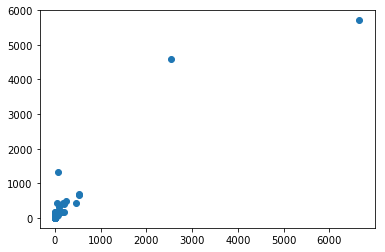

In [3]:
x, y = data[:,1], data[:,2]
plt.scatter(x,y)
plt.show()

Utilisez `sklearn` pour faire le fit et calculer les coefficients de la régression

Avec la librairie sklearn, il faut transformer le vecteur X en entrée, en passant d'une liste de nombres à une liste de feature vectors (liste de liste), même si il n'y a qu'un seul élément dans notre feature vector.

```
[[],
 [],
 [],
 ...
 []]
```

Il est en effet plutôt rare de n'avoir qu'un seul élément en entrée.

In [4]:
print(x) #ceci est l'ancien x

[  3.38500000e+00   4.80000000e-01   1.35000000e+00   4.65000000e+02
   3.63300000e+01   2.76600000e+01   1.48300000e+01   1.04000000e+00
   4.19000000e+00   4.25000000e-01   1.01000000e-01   9.20000000e-01
   1.00000000e+00   5.00000000e-03   6.00000000e-02   3.50000000e+00
   2.00000000e+00   1.70000000e+00   2.54700000e+03   2.30000000e-02
   1.87100000e+02   5.21000000e+02   7.85000000e-01   1.00000000e+01
   3.30000000e+00   2.00000000e-01   1.41000000e+00   5.29000000e+02
   2.07000000e+02   8.50000000e+01   7.50000000e-01   6.20000000e+01
   6.65400000e+03   3.50000000e+00   6.80000000e+00   3.50000000e+01
   4.05000000e+00   1.20000000e-01   2.30000000e-02   1.00000000e-02
   1.40000000e+00   2.50000000e+02   2.50000000e+00   5.55000000e+01
   1.00000000e+02   5.21600000e+01   1.05500000e+01   5.50000000e-01
   6.00000000e+01   3.60000000e+00   4.28800000e+00   2.80000000e-01
   7.50000000e-02   1.22000000e-01   4.80000000e-02   1.92000000e+02
   3.00000000e+00   1.60000000e+02

In [5]:
from sklearn import linear_model
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [7]:
print(x) #ceci est le nouveau x, notez la différence avec ci-dessus

[[  3.38500000e+00]
 [  4.80000000e-01]
 [  1.35000000e+00]
 [  4.65000000e+02]
 [  3.63300000e+01]
 [  2.76600000e+01]
 [  1.48300000e+01]
 [  1.04000000e+00]
 [  4.19000000e+00]
 [  4.25000000e-01]
 [  1.01000000e-01]
 [  9.20000000e-01]
 [  1.00000000e+00]
 [  5.00000000e-03]
 [  6.00000000e-02]
 [  3.50000000e+00]
 [  2.00000000e+00]
 [  1.70000000e+00]
 [  2.54700000e+03]
 [  2.30000000e-02]
 [  1.87100000e+02]
 [  5.21000000e+02]
 [  7.85000000e-01]
 [  1.00000000e+01]
 [  3.30000000e+00]
 [  2.00000000e-01]
 [  1.41000000e+00]
 [  5.29000000e+02]
 [  2.07000000e+02]
 [  8.50000000e+01]
 [  7.50000000e-01]
 [  6.20000000e+01]
 [  6.65400000e+03]
 [  3.50000000e+00]
 [  6.80000000e+00]
 [  3.50000000e+01]
 [  4.05000000e+00]
 [  1.20000000e-01]
 [  2.30000000e-02]
 [  1.00000000e-02]
 [  1.40000000e+00]
 [  2.50000000e+02]
 [  2.50000000e+00]
 [  5.55000000e+01]
 [  1.00000000e+02]
 [  5.21600000e+01]
 [  1.05500000e+01]
 [  5.50000000e-01]
 [  6.00000000e+01]
 [  3.60000000e+00]


`scikit-learn` dispose de plusieurs modules, dont un dédié à la régression linéaire. On y trouve différents modèles, mais  nous allons utiliser la version la plus simple, qui correspond à ce que nous avons vu en cours.

Le modèle est mis à disposition à travers une classe `LinearRegression`, que nous allons instancier et entraîner sur nos données.

In [9]:
regr = linear_model.LinearRegression() #instanciation du modèle
regr.fit(x,y)
regr.coef_, regr.intercept_ #pente et ordonnée à l'origine

(array([[ 0.96649637]]), array([ 91.00439621]))

Calculez le coefficient $R^2$

On peut utiliser directement la méthode de la classe, qui prend x et y en entrée et calcule le y_predicted à partir du fit fait précédemment.

In [13]:
regr.score(x, y)

0.87266208430433312

Le coefficient $R^2$ est également implémenté dans le sous-module `metrics`, et prend en argument directement y et y_predicted.

In [14]:
from sklearn.metrics import r2_score
r2_score(y, regr.predict(x))

0.87266208430433312

Représentez la droite correspondant à la régression superposée aux  données

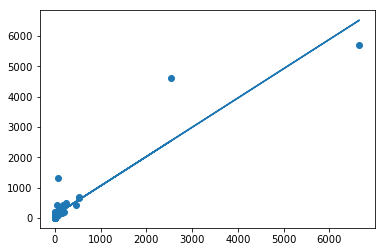

In [15]:
plt.scatter(x, y)
plt.plot(x, regr.predict(x))
plt.show()

Ce modèle semble fonctionner ($R^2$ proche de 1), mais est-ce le meilleur modèle possible ? 

Un bon réflexe pour diagnostiquer une régression linéaire consiste à regarder les résidus. Ils sont sensé correspondre à des erreurs gaussiennes.

Calculez les résidus et représenter la distribution.

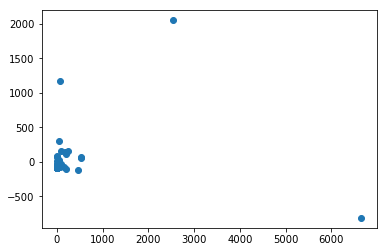

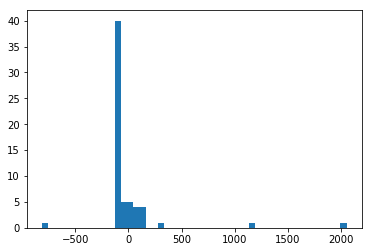

In [10]:
residuals = y - regr.predict(x)
plt.scatter(x, residuals)
plt.figure()
plt.hist(y - regr.predict(x), bins=50)
plt.show()

Le diagnostique des résidus n'est pas très concluant, puisqu'on ne retrouve pas les hypothèses de la régression linéaire. On ne voit pas une distribution normale symétrique et de variance fixe.

On va refaire l'exercice en transformant les variables avec une fonction logarithme. Pourquoi selon vous ?

In [11]:
x_log = np.log(x)
y_log = np.log(y)

Refaites l'exercice de la régression linéaire

In [12]:
regr_log = linear_model.LinearRegression()
regr_log.fit(x_log, y_log)
regr_log.coef_, regr_log.intercept_

(array([[ 0.75168594]]), array([ 2.13478868]))

Que vaut le nouveau $R^2$ ?

In [15]:
print(regr_log.score(x_log, y_log))
print(r2_score(y_log, regr_log.predict(x_log)))

0.920783716903
0.920783716903


Regardons la représentation graphique des données et de la régression

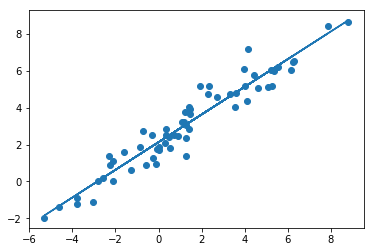

In [16]:
plt.scatter(x_log, y_log)
plt.plot(x_log, regr_log.predict(x_log))
plt.show()

On peut déjà constater à l'oeil que les données et la droite correspondent mieux que sur le premier graphe. Le logarithme a permis de "tasser" les valeurs extrêmes, pour avoir une régression qui correspond mieux à l'ensemble des données.

Le problème initial vient du fait que la régression n'est pas robuste face aux outliers (valeurs extrêmes / aberrantes). 

Regardons les résidus pour le nouveau modèle

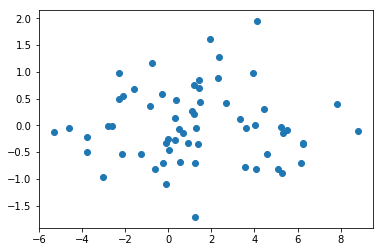

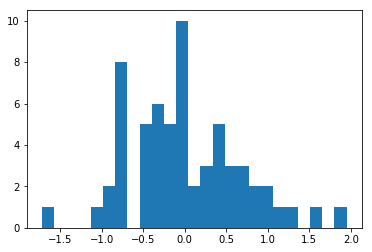

In [19]:
plt.scatter(x_log, y_log-regr_log.predict(x_log))
plt.figure()
plt.hist(y_log-regr_log.predict(x_log), bins=25)
plt.show()

L'histogrammme, même s'il n'est pas parfait, commence à ressembler un peu plus à une distribution symétrique étendue autour de 0. Notez qu'il existe des méthodes pour tester si une distribution de points suit une loi normale.